In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("stroke.csv")
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [5]:
df.shape

(15304, 12)

In [10]:
# Provide a summary of the dataset
print("\nSummary of the dataset:")

# 1. Number of missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

# 2. Data types of each column
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)

# 3. Basic statistics (mean, median, mode, etc.)
statistics = df.describe(include='all')
print("\nBasic Statistics:")
print(statistics)

# Additional statistics like mode for each column
modes = df.mode().iloc[0]  # Mode can return multiple values; we take the first one
print("\nMode of each column:")
print(modes)


Summary of the dataset:

Missing values per column:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Data types of each column:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Basic Statistics:
                  id  gender           age  hypertension  heart_disease  \
count   15304.000000   15304  15304.000000  15304.000000   15304.000000   
unique           NaN       3           NaN           NaN            NaN   
top              NaN  Fe

In [12]:
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)


Data types of each column:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


<Figure size 1500x1200 with 0 Axes>

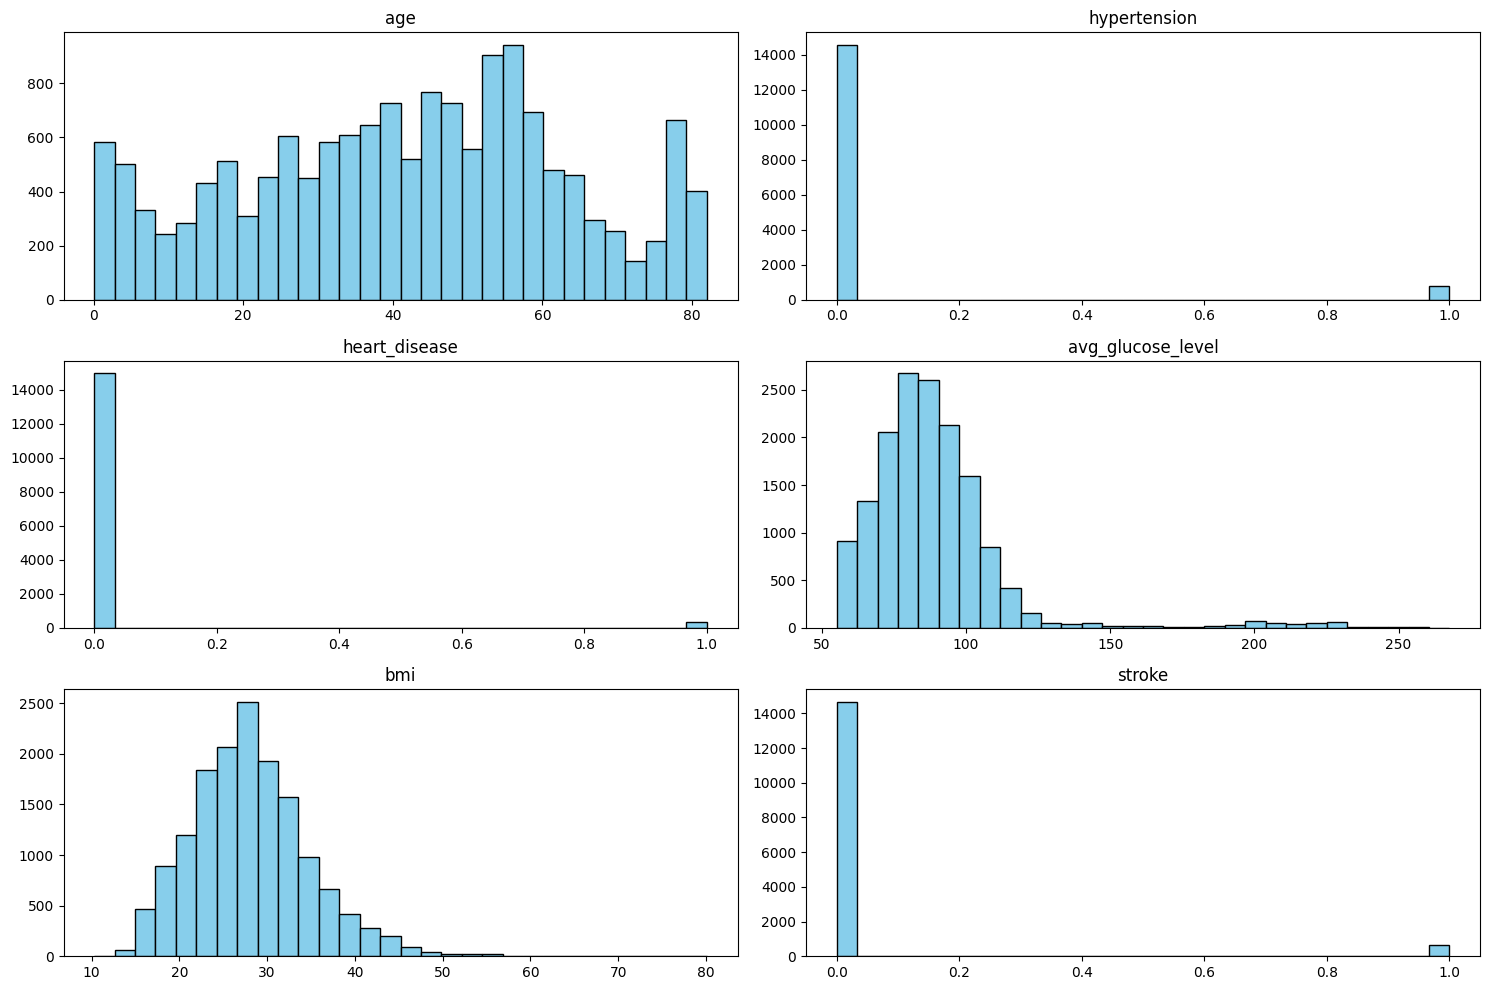

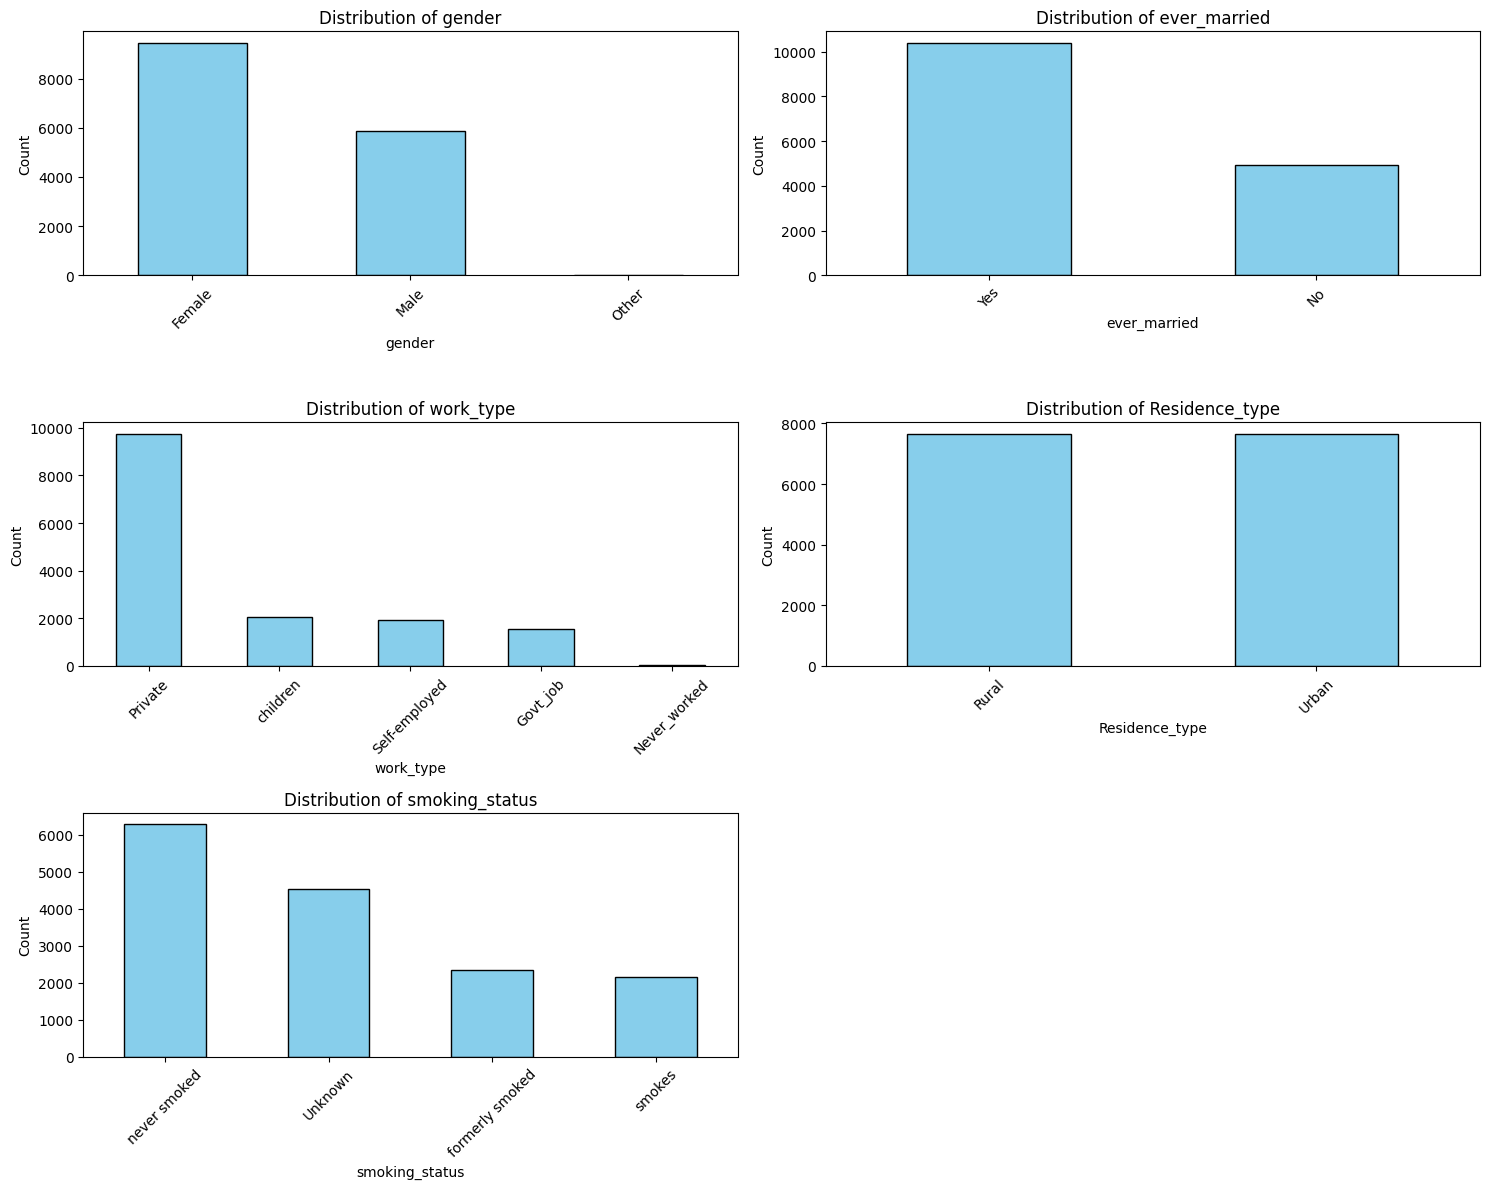

In [14]:
# univariate analysis

plt.figure(figsize=(15, 12))

# Plot histograms for numeric columns
numeric_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black', grid = False)
plt.tight_layout()
plt.show()

# Plot histograms for categorical columns (bar plots)
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)  # Adjust depending on how many plots you have
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [32]:
def is_binary(series):
    return set(series.dropna().unique()) <= {0, 1}

num_cols = []

for col in df:
    if df[col].dtype in ["int64", "int32", "float64", "float32"] and col != "id" and is_binary(df[col]) == False:
        num_cols.append(col)

statistics = df[num_cols].describe().T  # Transpose for easier reading

statistics['median'] = df[num_cols].median()  # Add the median to the summary
statistics['mode'] = df[num_cols].mode().iloc[0]  # Add the mode (only first mode if multiple)
statistics['std_dev'] = df[num_cols].std()  # Add the standard deviation

print("Key Statistical Measures:")
print(statistics[['mean', 'median', 'mode', 'std_dev']])

# outliers left out for the first as doesn't seem to be as interesting for this dataset for the first


Key Statistical Measures:
                        mean  median   mode    std_dev
age                41.417708   43.00  57.00  21.444673
avg_glucose_level  89.039853   85.12  85.84  25.476102
bmi                28.112721   27.60  23.40   6.722315
